# Cosmic Ladder at low redshifts: 
# The Local Hubble Parameter Exstime


# Import

In [1]:
#************************#
# OBJECTIVE OF THE CODE: #
#************************#
'''
The objective of this code is to partially reproduce the analysis pipiline of the paper 
"A Comprehensive Measurement of the Local Value of the Hubble Constant with 1 km s-1 Mpc-1 
Uncertainty from the Hubble Space Telescope and the SH0ES Team" by Adam G. Riess et al., 18 July 2022, 
archived in https://arxiv.org/pdf/2112.04510.pdf.

The idea is to estimate the Hubble Constant (H0) calibrating the so called Distance Ladder, which consists in a
sequence of distance indicators that are calibrated with each other. The final goal is to estimate the
Hubble Constant with a precision of 1 km/s/Mpc.

The code is divided in the following steps:
1. Importing the data:
    - y array: 
        - 2155 magnitudes of Cepheid in SN Ia host galaxies
        - 443 magnitudes of Cepheid minus the distance modulus of the host galaxy, i.e. NGC 4258 (1st anchor)
        - 55 magnitudes of Cepheid in the Andromeda host galaxy, i.e. M31 (2nd anchor)
        - 70 magnitudes of Cepheid minus the distance modulus of the host galaxy, i.e. Large Magellanic Cloud (LMC) (3rd anchor)
        (**WARNING**: in the covariance matrix C in allc file, 485 data are used combining LMC and SMC, i.e. Small Magellanic Cloud; 
        270 + 70 are from LMC and 145 are from SMC)
        - 42 magnitudes of SN Ia in 37 Cepheid host galaxies (**WARNING**: 77 datasets used)
        - absolute magnitude as measured by HST (Huble Space Telescope), i.e. 1st external constraint
        - absolute magnitude as measured by Gaia, i.e. 2nd external constraint
        - 0, i.e. 3rd external constraint on the zero point for calibration of LMC Cepheids luminosities
        - 0, i.e. 4th external constraint on the difference between measured and true distance for NGC 4258
        - 0, i.e. 5th external constraint on the difference between measured and true distance for LMC
        - 277 magnitudes of SN Ia minus the logaritmic expression in the article minus 25
    - L matrix:
        - 2155 equations for period P and metallicity of Cepheid in SN Ia host galaxies
        - 443 equations for period P and metallicity of Cepheid in NGC 4258
        - 55 equations for period P and metallicity of Cepheid in M31
        - 70 equations for period P and metallicity of Cepheid in LMC
        - 42 equations for magnitudes of SN Ia in 37 Cepheid host galaxies (WARNING: 77 datasets used)
        - 1 equation for the absolute magnitude as measured by HST
        - 1 equation for the absolute magnitude as measured by Gaia
        - 1 equation for the zero point for calibration of LMC Cepheids luminosities
        - 1 equation for the difference between measured and true distance for NGC 4258
        - 1 equation for the difference between measured and true distance for LMC
        - 277 equations for magnitudes of SN Ia in 37 Cepheid host galaxies
    - C matrix: for which formalism, please go to the article Section 2.1

2. Plotting the Covariace Matrix C as in Figure 11 of the article
3. Distance Ladder calibration
4. Hubble Constant estimation

The code is based on the following equations:
- The distance modulus equation
- The Hubble Law equation
- The Hubble Constant equation

The code is based on the following statistical methods:
- The weighted mean
- The weighted standard deviation
- The weighted covariance
- The weighted correlation coefficient
- The weighted linear regression
- The weighted least squares

The code is based on the following Python libraries:
- Numpy
- Pandas
- Scipy
- Matplotlib
- astropy

The code is based on the following Python functions:
- np.mean
- np.std
- np.cov
- np.corrcoef
- np.polyfit
- np.polyval
- np.linalg.lstsq
- np.sqrt
- np.sum
- np.dot
- np.diag
- np.transpose
- np.linalg.inv
- np.dot
- np.linalg.solve
- np.linspace
- np.polyfit

'''

'\nThe objective of this code is to partially reproduce the analysis pipiline of the paper \n"A Comprehensive Measurement of the Local Value of the Hubble Constant with 1 km s-1 Mpc-1 \nUncertainty from the Hubble Space Telescope and the SH0ES Team" by Adam G. Riess et al., 18 July 2022, \narchived in https://arxiv.org/pdf/2112.04510.pdf.\n\nThe idea is to estimate the Hubble Constant (H0) calibrating the so called Distance Ladder, which consists in a\nsequence of distance indicators that are calibrated with each other. The final goal is to estimate the\nHubble Constant with a precision of 1 km/s/Mpc.\n\nThe code is divided in the following steps:\n1. Importing the data:\n    - y array: \n        - 2155 magnitudes of Cepheid in SN Ia host galaxies\n        - 443 magnitudes of Cepheid minus the distance modulus of the host galaxy, i.e. NGC 4258 (1st anchor)\n        - 55 magnitudes of Cepheid in the Andromeda host galaxy, i.e. M31 (2nd anchor)\n        - 70 magnitudes of Cepheid minus t

In [2]:
#****************#
# USEFUL IMPORTS #
#****************#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits


In [3]:
#*************************#
# DATA IMPORT .fits FILES #
#*************************#

# Opening .fits files

# Opening ally
file_path = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/ally_shoes_ceph_topantheonwt6.0_112221.fits'
with fits.open(file_path) as hdul:
    hdul.info()  # Show information about the content of the file
    # Read the data
    y = hdul[0].data

# Opening alll
file_path1 = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/alll_shoes_ceph_topantheonwt6.0_112221.fits'
with fits.open(file_path1) as hdul:
    hdul.info()  # Show information about the content of the file
    # Read the data
    L = hdul[0].data

# Opening allc
file_path2 = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/allc_shoes_ceph_topantheonwt6.0_112221.fits'
with fits.open(file_path2) as hdul:
    hdul.info()  # Show information about the content of the file
    # Read the data
    C = hdul[0].data

# Printing y in a .dat file to check it
output_path = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/y.dat'
np.savetxt(output_path, y, fmt='%f')

# Printing L in a .dat file to check it
output_path1 = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/L.dat'
np.savetxt(output_path1, L, fmt='%f')

# Printing C in a .dat file to check it
# **WARNING**: the file is too big to be pushed on git
#output_path2 = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/C.dat'
#np.savetxt(output_path2, C, fmt='%f')

Filename: /home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/ally_shoes_ceph_topantheonwt6.0_112221.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (3492,)   float32   
Filename: /home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/alll_shoes_ceph_topantheonwt6.0_112221.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (3492, 47)   float32   
Filename: /home/git/AstroCosmoComputational/Students/Gabriele_Russo/ExamProject/allc_shoes_ceph_topantheonwt6.0_112221.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (3492, 3492)   float32   


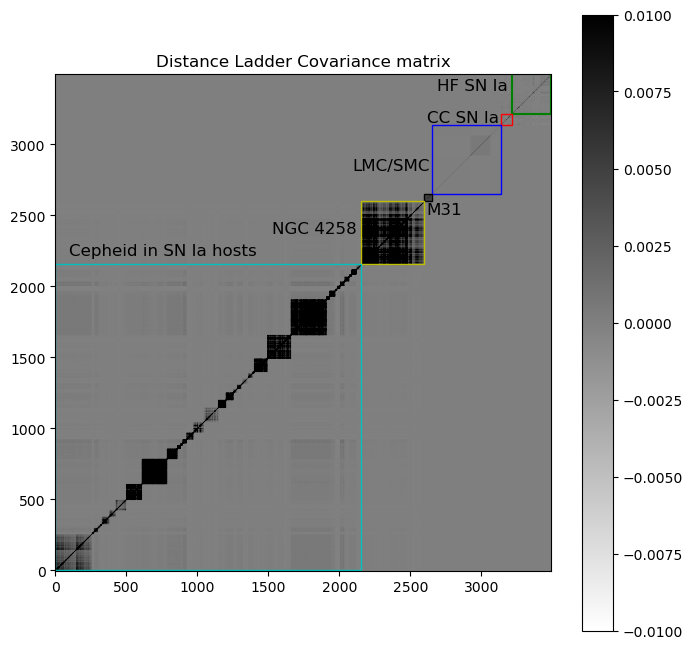

In [4]:
# Visualizing the Covariance with matplotlib
# OBS.: the color code has been selected to be in agreement with the article plot

plt.figure(figsize=(8, 8))
# Setting minimum and maximum values for the colormap
min = -0.01
max = 0.01
# Plotting the Covariance matrix
plt.imshow(C, cmap='gray_r', vmin=min, vmax=max, origin='lower') 
# **WARNING**: the origin='lower' is used to have the same orientation as in the article plot, but it gives
# the diagonal with respect to the matematical definition of the matrix flipped upside down
plt.colorbar()
plt.title('Distance Ladder Covariance matrix')

# Adding squares to highlight the different blocks of the matrix

# SN Ia in the Hubble Flow
x_hf = 3215
y_hf = 3215
size_hf = 277
square_hf = plt.Rectangle((x_hf, y_hf), size_hf, size_hf, edgecolor='g', facecolor='none', linewidth=1.5)
plt.gca().add_patch(square_hf)
label_text_hf = 'HF SN Ia'
plt.text(x_hf - size_hf, y_hf + 200 , label_text_hf, color='k', ha='center', va='center', fontsize=12)

# SN Ia in Cepheid Host Galaxies (42 SN Ia, but 77 datasets)
x_cc = 3138
y_cc = 3138
size_cc = 77
square_cc = plt.Rectangle((x_cc, y_cc), size_cc, size_cc, edgecolor='r', facecolor='none', linewidth=1.)
plt.gca().add_patch(square_cc)
label_text_cc = 'CC SN Ia'
plt.text(x_cc - 3.5*size_cc, y_cc + 50, label_text_cc, color='k', ha='center', va='center', fontsize=12)

# LMC and SMC
x_lmc = 2653
y_lmc = 2653
size_lmc = 485
square_lmc = plt.Rectangle((x_lmc, y_lmc), size_lmc, size_lmc, edgecolor='b', facecolor='none', linewidth=1.)
plt.gca().add_patch(square_lmc)
label_text_lmc = 'LMC/SMC'
plt.text(x_lmc - 0.6*size_lmc, y_lmc + 200, label_text_lmc, color='k', ha='center', va='center', fontsize=12)

# M31
x_m31 = 2598
y_m31 = 2598
size_m31 = 55
square_m31 = plt.Rectangle((x_m31, y_m31), size_m31, size_m31, edgecolor='k', facecolor='none', linewidth=1.)
plt.gca().add_patch(square_m31)
label_text_m31 = 'M31'
plt.text(x_m31 + 2.5*size_m31, y_m31 - 60, label_text_m31, color='k', ha='center', va='center', fontsize=12)

# NGC 4258
x_ngc = 2155
y_ngc = 2155
size_ngc = 443
square_ngc = plt.Rectangle((x_ngc, y_ngc), size_ngc, size_ngc, edgecolor='y', facecolor='none', linewidth=1.)
plt.gca().add_patch(square_ngc)
label_text_ngc = 'NGC 4258'
plt.text(x_ngc - 0.75*size_ngc, y_ngc + 250, label_text_ngc, color='k', ha='center', va='center', fontsize=12)

# Cepheid in SN Ia Host Galaxies
x_ceph = 0.
y_ceph = 0.
size_ceph = 2155
square_ceph = plt.Rectangle((x_ceph, y_ceph), size_ceph, size_ceph, edgecolor='c', facecolor='none', linewidth=1.)
plt.gca().add_patch(square_ceph)
label_text_ceph = 'Cepheid in SN Ia hosts'
plt.text(x_ceph + 0.35*size_ceph, y_ceph + 2250, label_text_ceph, color='k', ha='center', va='center', fontsize=12)



plt.show()